<a href="https://colab.research.google.com/github/Naved555/Spring_5731/blob/main/Jiwani_Naved_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [18]:
import csv
import pandas as pd
import re
import re
import math
import gensim
from collections import defaultdict

df = pd.read_csv("/content/sample_data/cleaned_data.csv")
a = df
text= df.to_string()

In [2]:
def tokenize(text):
    tokens = []
    for word in text.lower().split():
        for char in word:
            if not char.isalnum():
                word = word.replace(char, "")
        if word:
            tokens.append(word)
    return tokens

In [3]:
#Counting the frequency of all the N-grams (N=3).
def getNgrams(text, n):
    tokens = tokenize(text)
    return [tuple(tokens[i:i+n]) for i in range(len(tokens) - n + 1)]

def count_ngrams(ngrams):
    ngram_counts = {}
    for ngram in ngrams:
        ngram_counts[ngram] = ngram_counts.get(ngram, 0) + 1
    return ngram_counts

ngrams= getNgrams(text,3)
frequency = count_ngrams(ngrams)
print(frequency)




{('id', 'name', 'birthday'): 1, ('name', 'birthday', 'bio'): 1, ('birthday', 'bio', 'cleanedbio'): 1, ('bio', 'cleanedbio', 'sentiment'): 1, ('cleanedbio', 'sentiment', 'unnamed'): 1, ('sentiment', 'unnamed', '6'): 1, ('unnamed', '6', '0'): 1, ('6', '0', '0'): 1, ('0', '0', 'kay'): 1, ('0', 'kay', 'aiko'): 1, ('kay', 'aiko', 'abe'): 1, ('aiko', 'abe', '19270509t000000'): 1, ('abe', '19270509t000000', 'nisei'): 1, ('19270509t000000', 'nisei', 'female'): 1, ('nisei', 'female', 'born'): 288, ('female', 'born', 'may'): 41, ('born', 'may', '9'): 10, ('may', '9', '1927'): 2, ('9', '1927', 'in'): 2, ('1927', 'in', 'selleck'): 1, ('in', 'selleck', 'washington'): 3, ('selleck', 'washington', 'spent'): 2, ('washington', 'spent', 'much'): 4, ('spent', 'much', 'of'): 2, ('much', 'of', 'childhood'): 2, ('of', 'childhood', 'in'): 5, ('childhood', 'in', 'beaverton'): 1, ('in', 'beaverton', 'oregon'): 2, ('beaverton', 'oregon', 'where'): 2, ('oregon', 'where', 'father'): 4, ('where', 'father', 'owned'

In [4]:
#Calculating the probabilities for all the bigrams in the dataset
def bigram_probabilities(ngram_counts):
    bigram_probs = {}
    for ngram, count in ngram_counts.items():
        if len(ngram) == 2:  # To Ensure only bigrams are processed
            word1, word2 = ngram
            bigram_probs[(word1, word2)] = count / ngram_counts.get(word1, 0)
    return bigram_probs

bigram_probabilities(frequency)


{}

In [5]:
documents = df.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

def simple_tokenizer(text):
    tokens = text.lower().split()
    tokens = [token.strip('.,"') for token in tokens]
    return tokens

def is_noun(word):
    return word.endswith(('n', 'x', 's'))

def extract_nouns(text):
    tokens = simple_tokenizer(text)
    nouns = [token for token in tokens if is_noun(token)]
    return nouns


In [6]:
from collections import Counter

noun_frequencies = Counter()
for document in documents:
    nouns = extract_nouns(document)
    noun_frequencies.update(nouns)

max_frequency = max(noun_frequencies.values())

relative_probabilities = {noun: freq / max_frequency for noun, freq in noun_frequencies.items()}

print("Noun Phrase Relative Probabilities:")
print(relative_probabilities)


Noun Phrase Relative Probabilities:
{'born': 0.5169748826939001, 'in': 1.0, 'washington': 0.28539884073971844, 'beaverton': 0.0011040574109853713, 'oregon': 0.13524703284570797, 'an': 0.060171128898702735, 'conversion': 0.0002760143527463428, 'concentration': 0.21805133866961082, 'homeless': 0.0005520287054926856, 'own': 0.014076731990063483, 'convers': 0.002760143527463428, 'christian': 0.005520287054926856, 'success': 0.014352746342809827, 'americans': 0.016560861164780567, 'was': 0.22467568313552305, 'when': 0.03422577974054651, 'japan': 0.20093844879933756, 'times': 0.0019321004692243997, 'on': 0.08887662158432239, 'farms': 0.005244272702180514, 'loss': 0.0022081148219707425, 'elements': 0.0002760143527463428, 'corps': 0.006624344465912227, 'aeronautics': 0.0002760143527463428, 'administration': 0.007452387524151256, 'members': 0.007728401876897599, 'veterans': 0.002760143527463428, 'japanes': 0.10488545404361027, 'american': 0.15456803753795198, 'univers': 0.0516146839635661, 'vet

In [7]:


# Creating the DataFrame to hold the noun phrases and their relative probabilities of the output
df = pd.DataFrame(list(relative_probabilities.items()), columns=['Noun Phrase', 'Relative Probability'])

# Document IDs are from 1 to length of documents
df['Document ID'] = pd.Series(range(1, len(documents) + 1))

# Rearranging the DataFrame to have Document IDs as rows, Noun Phrases as columns
df_pivot = df.pivot(index='Document ID', columns='Noun Phrase', values='Relative Probability').fillna(0)

print(df_pivot)


Noun Phrase  '70s      '80s  (ann  (asian       (in  (pullman  1900s  1910s  \
Document ID                                                                   
NaN           0.0  0.000276   0.0     0.0  0.000276       0.0    0.0    0.0   
1.0           0.0  0.000000   0.0     0.0  0.000000       0.0    0.0    0.0   
2.0           0.0  0.000000   0.0     0.0  0.000000       0.0    0.0    0.0   
3.0           0.0  0.000000   0.0     0.0  0.000000       0.0    0.0    0.0   
4.0           0.0  0.000000   0.0     0.0  0.000000       0.0    0.0    0.0   
...           ...       ...   ...     ...       ...       ...    ...    ...   
977.0         0.0  0.000000   0.0     0.0  0.000000       0.0    0.0    0.0   
978.0         0.0  0.000000   0.0     0.0  0.000000       0.0    0.0    0.0   
979.0         0.0  0.000000   0.0     0.0  0.000000       0.0    0.0    0.0   
980.0         0.0  0.000000   0.0     0.0  0.000000       0.0    0.0    0.0   
981.0         0.0  0.000000   0.0     0.0  0.000000 

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [24]:
# Write your code here
def compute_tf(tokens):
    tf = defaultdict(int)
    for token in tokens:
        tf[token] += 1
    total_count = len(tokens)
    for token, count in tf.items():
        tf[token] = count / total_count  # Normalized TF
    return tf

def compute_idf(documents):
    idf = defaultdict(lambda: 0)
    total_documents = len(documents)

    for document in documents:
        seen_tokens = set()
        for token in tokenize(document):
            if token not in seen_tokens:
                idf[token] += 1
                seen_tokens.add(token)

    for token, count in idf.items():
        idf[token] = math.log(total_documents / count)

    return idf

def compute_tf_idf(documents):
    document_tfs = [compute_tf(tokenize(doc)) for doc in documents]
    idf = compute_idf(documents)

    tf_idf_documents = []
    for tf in document_tfs:
        doc_tf_idf = {}
        for token, value in tf.items():
            doc_tf_idf[token] = value * idf[token]
        tf_idf_documents.append(doc_tf_idf)

    return tf_idf_documents

def cosine_similarity(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([val**2 for val in vec1.values()])
    sum2 = sum([val**2 for val in vec2.values()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def rank_documents(documents, query):
    tf_idf_documents = compute_tf_idf(documents)
    query_tf = compute_tf(tokenize(query))
    idf = compute_idf(documents + [query])
    query_tf_idf = {token: query_tf[token] * idf[token] for token in query_tf}

    scores = [cosine_similarity(doc_tf_idf, query_tf_idf) for doc_tf_idf in tf_idf_documents]

    ranked_documents = sorted(list(enumerate(scores)), key=lambda x: x[1], reverse=True)
    return ranked_documents

documents = df.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


query = "Grew up on the Squamish Reservation near Vancouver Canada"

ranked_docs = rank_documents(documents, query)
print("Document Ranking is:")
for docs, score in ranked_docs:
    print(f"Document {docs + 1}: Score {score:.4f}")







Document Ranking is:
Document 661: Score 0.0950
Document 727: Score 0.0828
Document 260: Score 0.0794
Document 278: Score 0.0718
Document 58: Score 0.0703
Document 885: Score 0.0659
Document 855: Score 0.0640
Document 609: Score 0.0627
Document 49: Score 0.0623
Document 414: Score 0.0610
Document 772: Score 0.0604
Document 705: Score 0.0595
Document 804: Score 0.0586
Document 869: Score 0.0578
Document 172: Score 0.0576
Document 460: Score 0.0571
Document 646: Score 0.0564
Document 513: Score 0.0557
Document 344: Score 0.0556
Document 242: Score 0.0548
Document 475: Score 0.0547
Document 711: Score 0.0546
Document 586: Score 0.0546
Document 77: Score 0.0546
Document 592: Score 0.0545
Document 48: Score 0.0541
Document 649: Score 0.0538
Document 203: Score 0.0534
Document 980: Score 0.0533
Document 753: Score 0.0532
Document 521: Score 0.0531
Document 737: Score 0.0531
Document 921: Score 0.0529
Document 678: Score 0.0527
Document 684: Score 0.0526
Document 749: Score 0.0525
Document 74

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [23]:
from gensim.models import Word2Vec
sentences = [['born', 'washington', 'oregon', 'homeless', 'christian', 'success'],['washington', 'oregon', 'homeless', 'christian'],['washington', 'oregon', 'homeless']]


# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec_model.model")


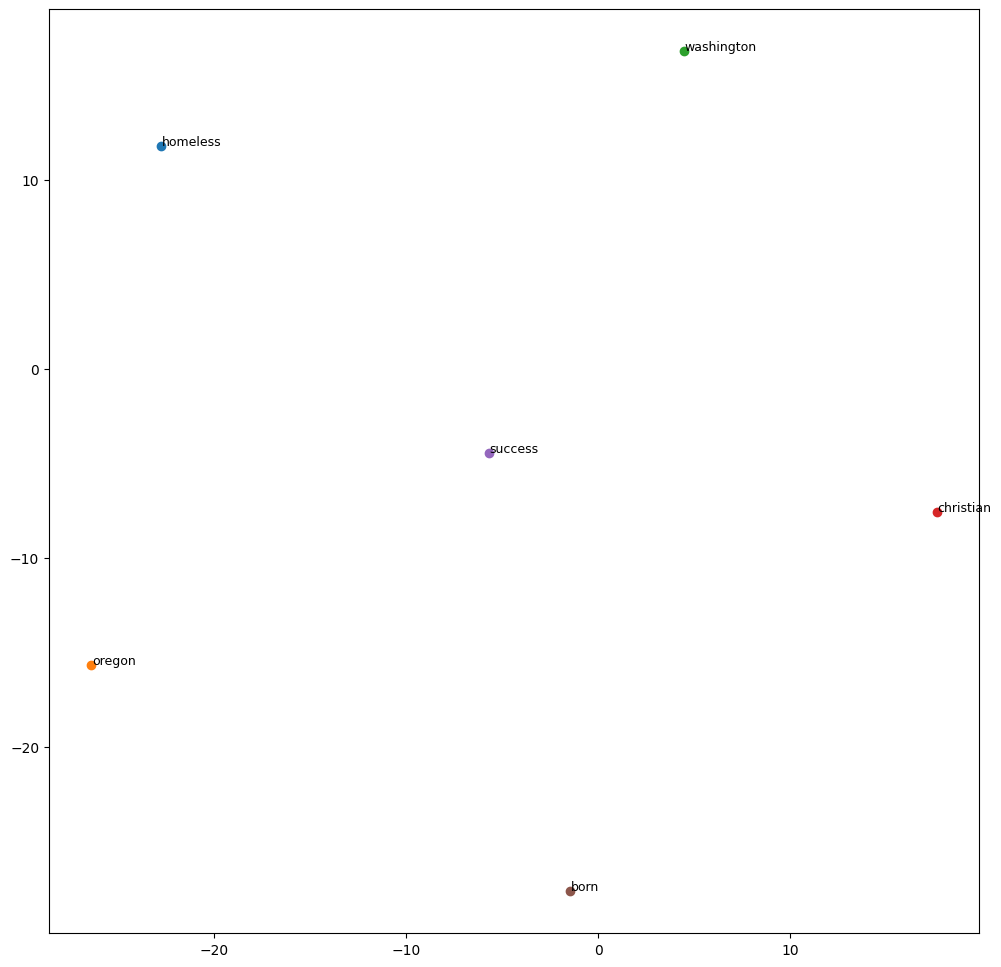

In [22]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from gensim.models import Word2Vec

# Load the model
model = Word2Vec.load("word2vec_model.model")

# Extract the word vectors
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])

# Use t-SNE to reduce the vectors' dimensions to 2
tsne = TSNE(n_components=2, random_state=0, perplexity=5)  # Lower perplexity value
word_vectors_reduced = tsne.fit_transform(word_vectors)

# Plotting the words in 2D space
plt.figure(figsize=(12, 12))
for i, word in enumerate(words):
    plt.scatter(word_vectors_reduced[i, 0], word_vectors_reduced[i, 1])
    plt.text(word_vectors_reduced[i, 0]+0.03, word_vectors_reduced[i, 1]+0.03, word, fontsize=9)
plt.show()



## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
'''The assignment was really exciting. The parts I found challenging were Ranking the documents part.
I thoroughly enjoyed the plotting of the word embedding model. The time for this assignment was perfectly fine
with the complexity of the assignment'''